In [1]:
import pandas as pd

In [2]:
df = pd.read_json('all.json')

In [3]:
# number of samples for each genre
df.groupby(['genre'])[['text']].count()

,text
genre,
abstract,40
dialogues,239
dissertation,318
enquiry,632
essay,555
history,5045
letter,46
political discourses,483
treatise,1218


### Choose only some of the samples

#### This part is implemented as *import_dataset* function in *utils*

In [4]:
# ignore abstract, letter
# take all dialogues, dissertation, essays, political discourses
# choose 500 random paragraphs from history, treatise, enquiry

history_dataset = df[df.genre=='history'].sample(n=500, random_state=13)
treatise_dataset = df[df.genre=='treatise'].sample(n=500, random_state=13)
enquiry_dataset = df[df.genre=='enquiry'].sample(n=500, random_state=13)

dialogues_dataset = df[df.genre=='dialogues']
dissertation_dataset = df[df.genre=='dissertation']
essay_dataset = df[df.genre=='essay']
discourses_dataset = df[df.genre=='political discourses']

In [5]:
# concatenate all datasets into one

combined_dataset = pd.concat([history_dataset, 
                    treatise_dataset, 
                    dialogues_dataset, 
                    dissertation_dataset, 
                    essay_dataset,
                    enquiry_dataset,
                    discourses_dataset], ignore_index=True)

### Let's look inside

In [6]:
# count tokens in each sample

def count_tokens(value):
    return len(value.split())

combined_dataset['len_sample'] = df['text'].apply(count_tokens)

<AxesSubplot:xlabel='genre'>

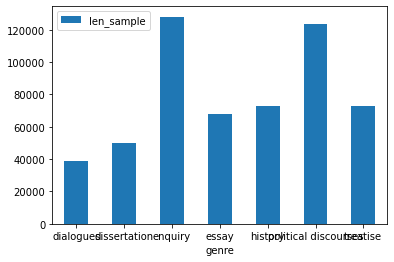

In [8]:
# number of tokens by genre

combined_dataset.groupby(['genre'])[['len_sample']].sum('len_sample').plot.bar(rot=0)

<AxesSubplot:xlabel='genre'>

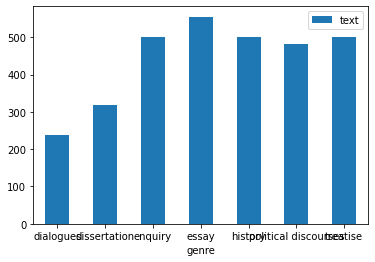

In [10]:
# number of samples by genre

combined_dataset.groupby('genre')[['text']].count().plot.bar(rot=0)

### Wrapping it into a HF Dataset structure

In [11]:
from datasets import Dataset, DatasetDict

In [12]:
unsplit_dataset = Dataset.from_pandas(combined_dataset)

train_test_dataset = unsplit_dataset.train_test_split(test_size=0.2, shuffle=True, seed=13)

test_eval_dataset = train_test_dataset['test'].train_test_split(test_size=0.5, shuffle=True, seed=13)


dataset = DatasetDict({'train' : train_test_dataset['train'], 
                       'eval' : test_eval_dataset['train'],
                       'test' : test_eval_dataset['test']})

#### A look inside the split

In [13]:
from collections import Counter

In [14]:
Counter(dataset['train']['genre']).most_common()

[('essay', 430),
 ('enquiry', 412),
 ('treatise', 408),
 ('history', 395),
 ('political discourses', 382),
 ('dissertation', 250),
 ('dialogues', 199)]

In [15]:
Counter(dataset['test']['genre']).most_common()

[('essay', 63),
 ('history', 60),
 ('political discourses', 49),
 ('treatise', 45),
 ('enquiry', 43),
 ('dissertation', 33),
 ('dialogues', 17)]

In [16]:
Counter(dataset['eval']['genre']).most_common()

[('essay', 62),
 ('political discourses', 52),
 ('treatise', 47),
 ('history', 45),
 ('enquiry', 45),
 ('dissertation', 35),
 ('dialogues', 23)]